In [1]:
import pandas as pd

FILE_NAME = "data/ethereum.csv"

eth = pd.read_csv(FILE_NAME)

print(f"{len(eth)} rows")

eth["Date"] = pd.to_datetime(eth['Date'])

last_date = eth["Date"].max()

print(f"Latest row is from {last_date}")

eth.head()

2031 rows
Latest row is from 2021-02-27 23:59:59


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [2]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2031 non-null   int64         
 1   Name       2031 non-null   object        
 2   Symbol     2031 non-null   object        
 3   Date       2031 non-null   datetime64[ns]
 4   High       2031 non-null   float64       
 5   Low        2031 non-null   float64       
 6   Open       2031 non-null   float64       
 7   Close      2031 non-null   float64       
 8   Volume     2031 non-null   float64       
 9   Marketcap  2031 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 158.8+ KB


In [3]:
eth.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2.031000e+03,2.031000e+03
mean,1016.000000,267.068034,246.986450,257.490557,258.142275,5.429599e+09,2.698656e+10
std,586.443518,322.096221,292.253460,308.347903,309.321155,8.100359e+09,3.347336e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,508.500000,13.221850,12.515050,12.858200,12.866100,2.848855e+07,1.086243e+09
50%,1016.000000,189.088865,180.317159,184.943356,185.028722,1.844270e+09,1.972963e+10
75%,1523.500000,342.238919,317.625992,332.716492,333.370499,7.944177e+09,3.280357e+10
max,2031.000000,2036.286493,1896.684508,1959.902977,1960.164744,6.073363e+10,2.249103e+11


<AxesSubplot:xlabel='Date'>

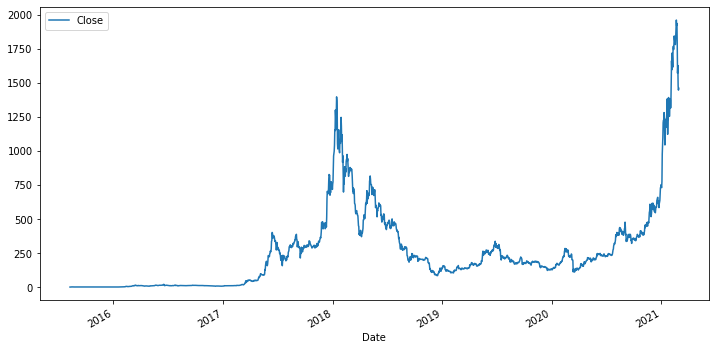

In [4]:
eth.plot(kind="line", x="Date", y="Close", figsize=(12,6))

In [5]:
prophet_data = eth[["Date", "Close"]]

prophet_data = prophet_data.rename(columns = {
    "Date": "ds",
    "Close": "y"
})

prophet_data.head()

,ds,y
0,2015-08-08 23:59:59,0.753325
1,2015-08-09 23:59:59,0.701897
2,2015-08-10 23:59:59,0.708448
3,2015-08-11 23:59:59,1.067860
4,2015-08-12 23:59:59,1.217440


In [6]:
from prophet import Prophet

prophet = Prophet(daily_seasonality=True)

prophet.fit(prophet_data)

print("Data fitted")

Data fitted


In [7]:
future = prophet.make_future_dataframe(periods=365, include_history=False)

future.tail()

,ds
360,2022-02-23 23:59:59
361,2022-02-24 23:59:59
362,2022-02-25 23:59:59
363,2022-02-26 23:59:59
364,2022-02-27 23:59:59


In [8]:
forecast = prophet.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
360,2022-02-23 23:59:59,2058.071630,1516.863540,2613.087921
361,2022-02-24 23:59:59,2050.884015,1495.132078,2588.651455
362,2022-02-25 23:59:59,2045.995028,1464.786470,2595.848473
363,2022-02-26 23:59:59,2041.005191,1441.169310,2586.833298
364,2022-02-27 23:59:59,2032.634734,1471.372768,2568.624481


In [9]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          365 non-null    datetime64[ns]
 1   trend                       365 non-null    float64       
 2   yhat_lower                  365 non-null    float64       
 3   yhat_upper                  365 non-null    float64       
 4   trend_lower                 365 non-null    float64       
 5   trend_upper                 365 non-null    float64       
 6   additive_terms              365 non-null    float64       
 7   additive_terms_lower        365 non-null    float64       
 8   additive_terms_upper        365 non-null    float64       
 9   daily                       365 non-null    float64       
 10  daily_lower                 365 non-null    float64       
 11  daily_upper                 365 non-null    float64       

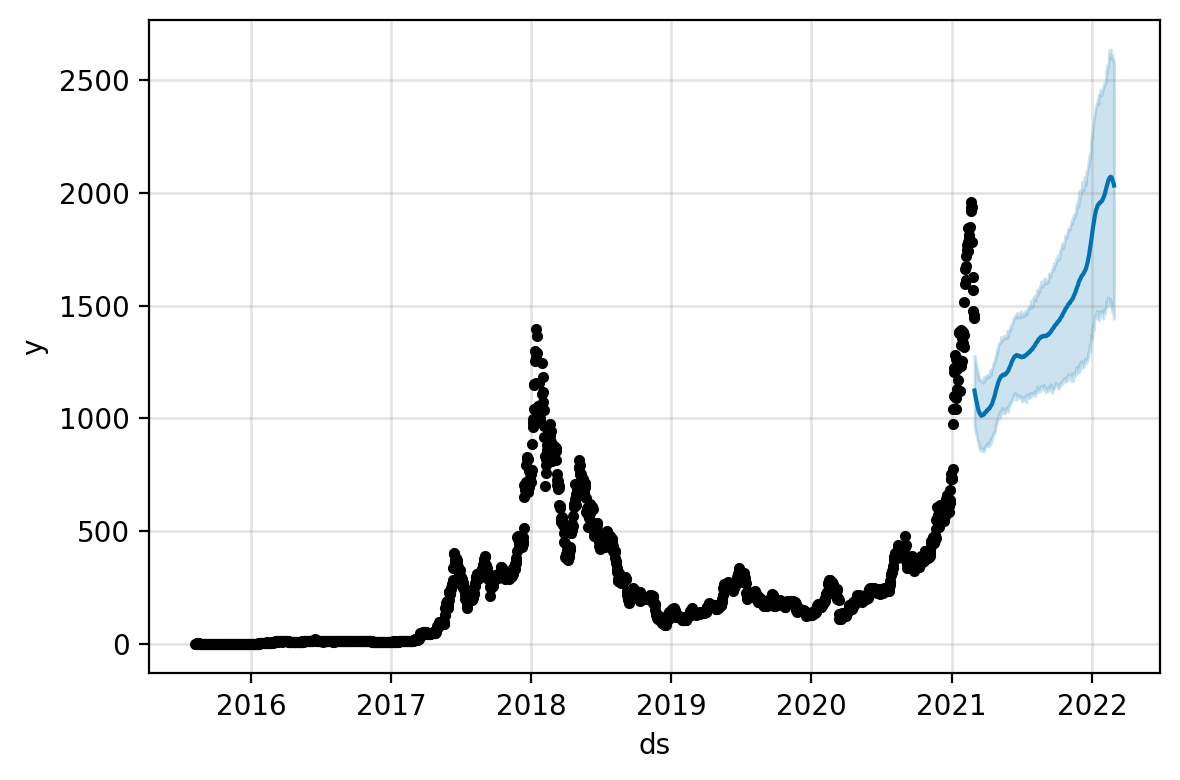

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure(dpi=200)

fig.set_facecolor("white")

prophet_plot_forecast_fig = prophet.plot(forecast, ax=fig.gca());

prophet_plot_forecast_fig.savefig('forecast_details.png')

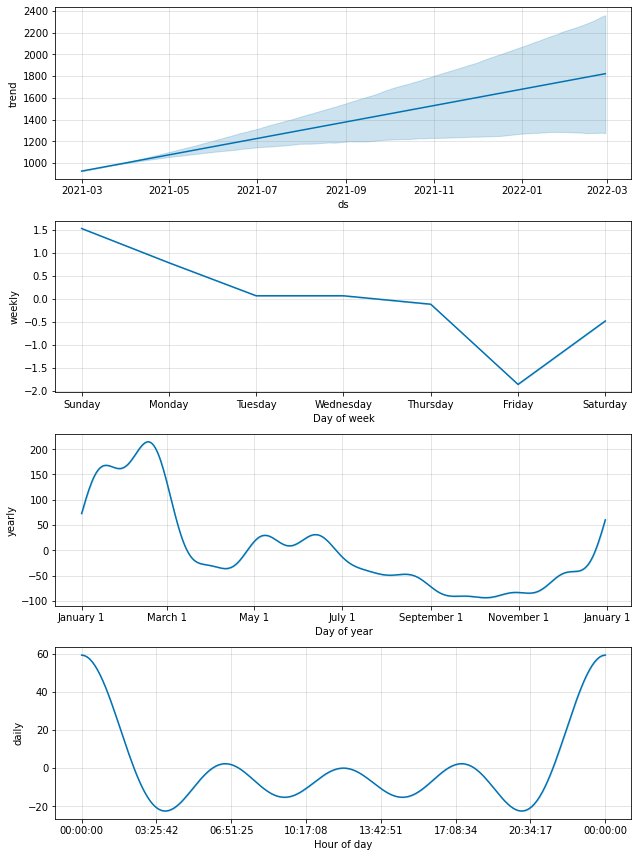

In [11]:
prophet.plot_components(forecast);

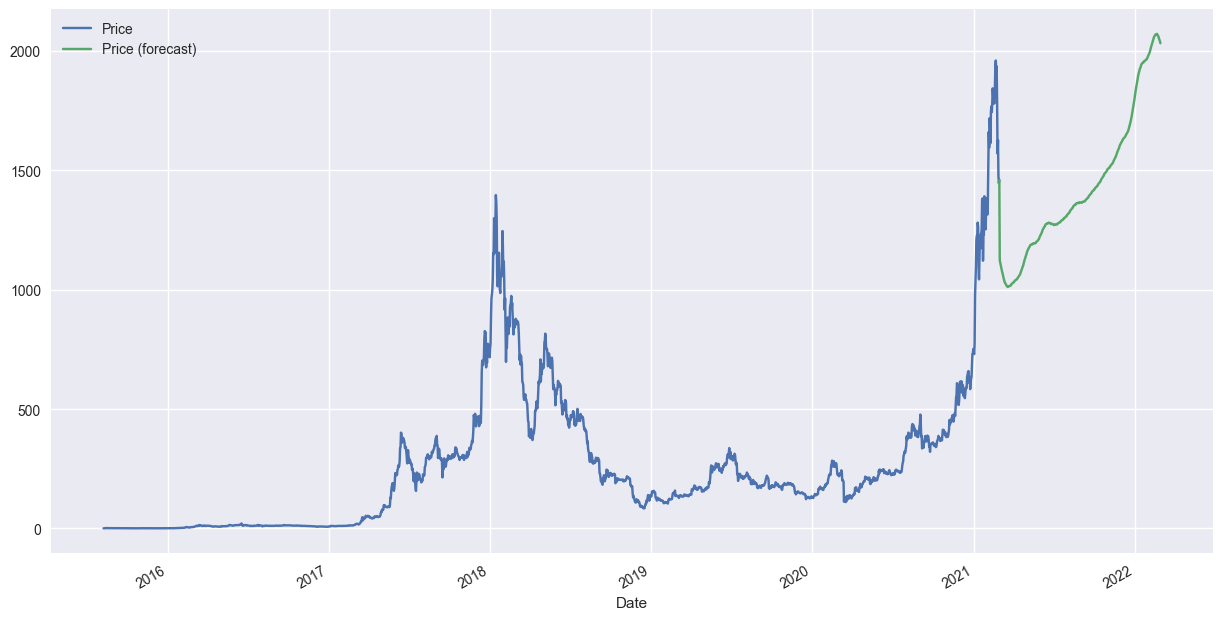

In [12]:
PLOT_COLUMS = [
    "Price",
    "Price (forecast)",
]

mpl.style.use("seaborn")

result_df = prophet_data.copy()

# Add first result from forecast as y to connect dots
result_df = result_df.append(result_df.tail(1).rename(columns = {"y": "yhat"}))

result_df = result_df.append(forecast)

result_df = result_df.rename(columns = {
    "ds": "Date",
    "y": "Price",
    "yhat": "Price (forecast)"
})

fig = plt.figure(dpi=100)

fig.set_facecolor("white")

plot = result_df.plot(x="Date", y=PLOT_COLUMS, figsize=(15, 8), ax=fig.gca())

plot_fig = plot.get_figure()

plot_fig.savefig('forecast.png')